<h2> Unit 2 Live Session </h2>
#### W203 Instructional Team

#### Exploratory Data Analysis
<center>![title](data.png)</center>

#### Class Announcements
1. Announcement 1
2. Announcement 2
3. Announcement 3

### 1.0 Pre Class Exercise Responses

 First preclass response

> First follow up question

Second preclass response

> Second follow up question

Third preclass response

> Third preclass response

### 2.0 Data Exercise
You are to begin an exploratory analysis with the objective of understanding how the price of a home relates to neighborhood characteristics, with an emphasis on crime.

In [22]:
setwd('/Users/ericpenner/Desktop/Berkeley/W203_ls_repo/unit_2')
Boston = read.csv("Boston_w203.csv")
library(car)
library(repr)

 Variable Name  |  Description 
--------- | ---------------
crim | per capita crime rate by town
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
nox | nitrogen oxides concentration (parts per 10 million)
rm | average number of rooms per dwelling
age | proportion of owner-occupied units built prior to 1940
dis | weighted mean of distances to five Boston employment centres 
rad | index of accessibility to radial highways 
tax | full-value property-tax rate per \$10,000 
ptratio | pupil-teacher ratio by town 
black | $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town 
lstat | lower status of the population (percent) 
medv | median value of owner-occupied homes in \$1000

**2.1** Generate a scatterplot matrix for all metric variables. Take a few minutes to draw as many insights as you can about the relationships in the data.

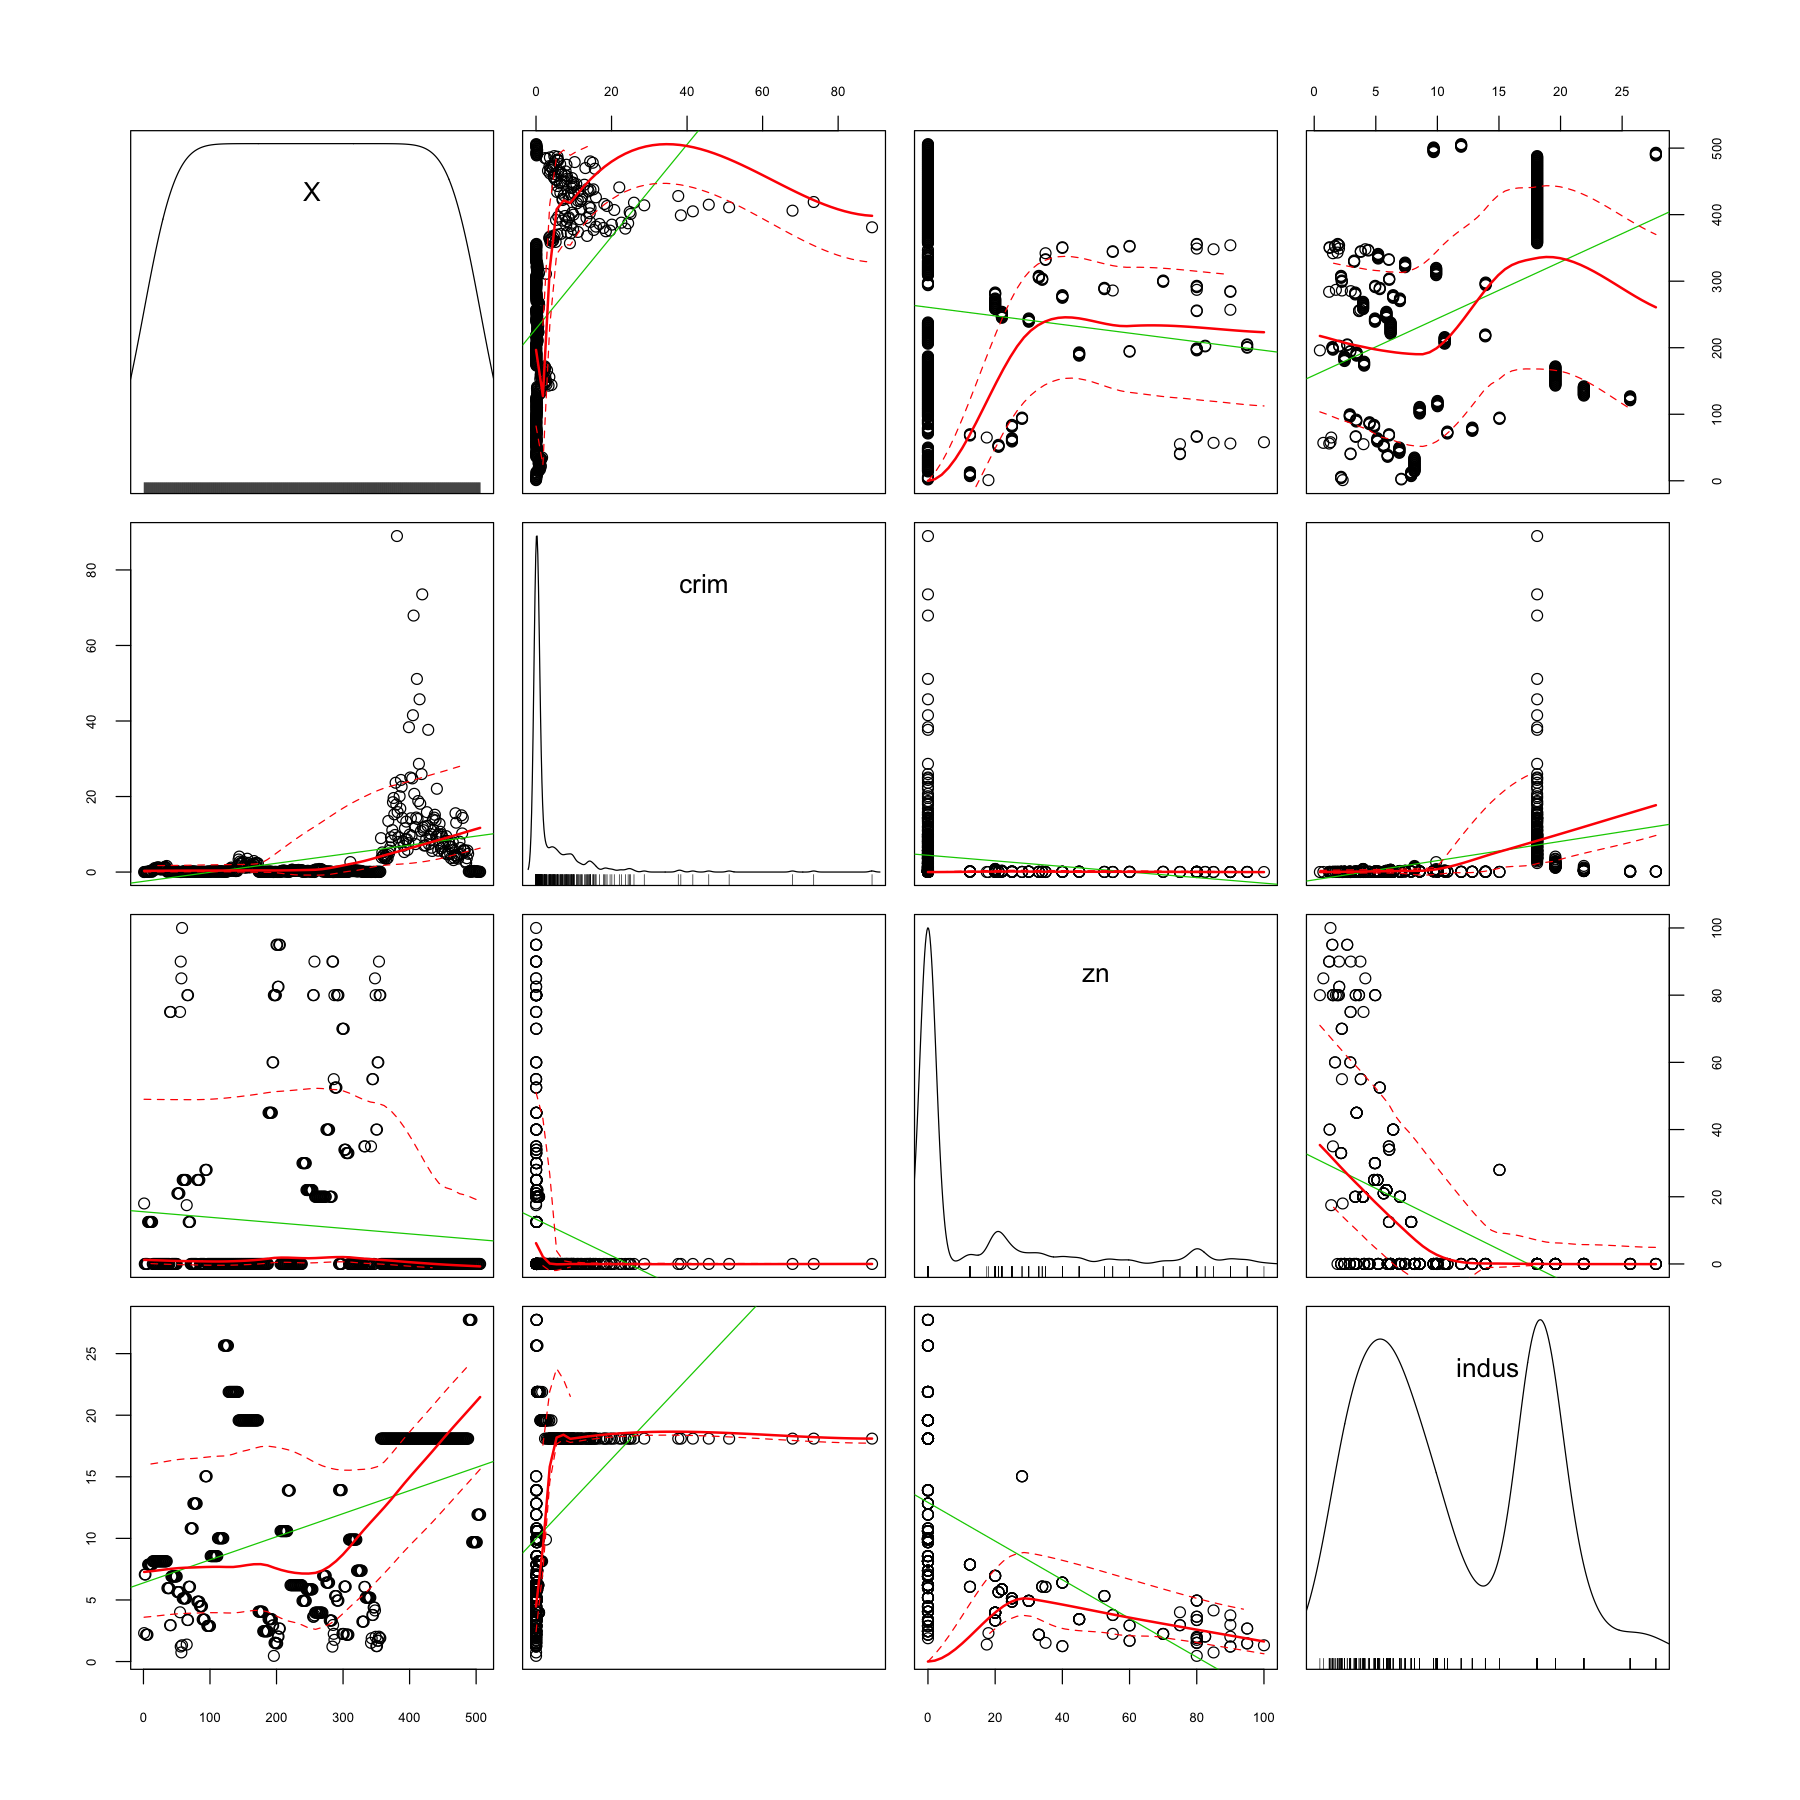

In [80]:
options(repr.plot.height = 15, repr.plot.width = 15, repr.plot.pointsize = 22)
scatterplotMatrix(Boston[,1:4])

> Here you can see blah and blah and blah

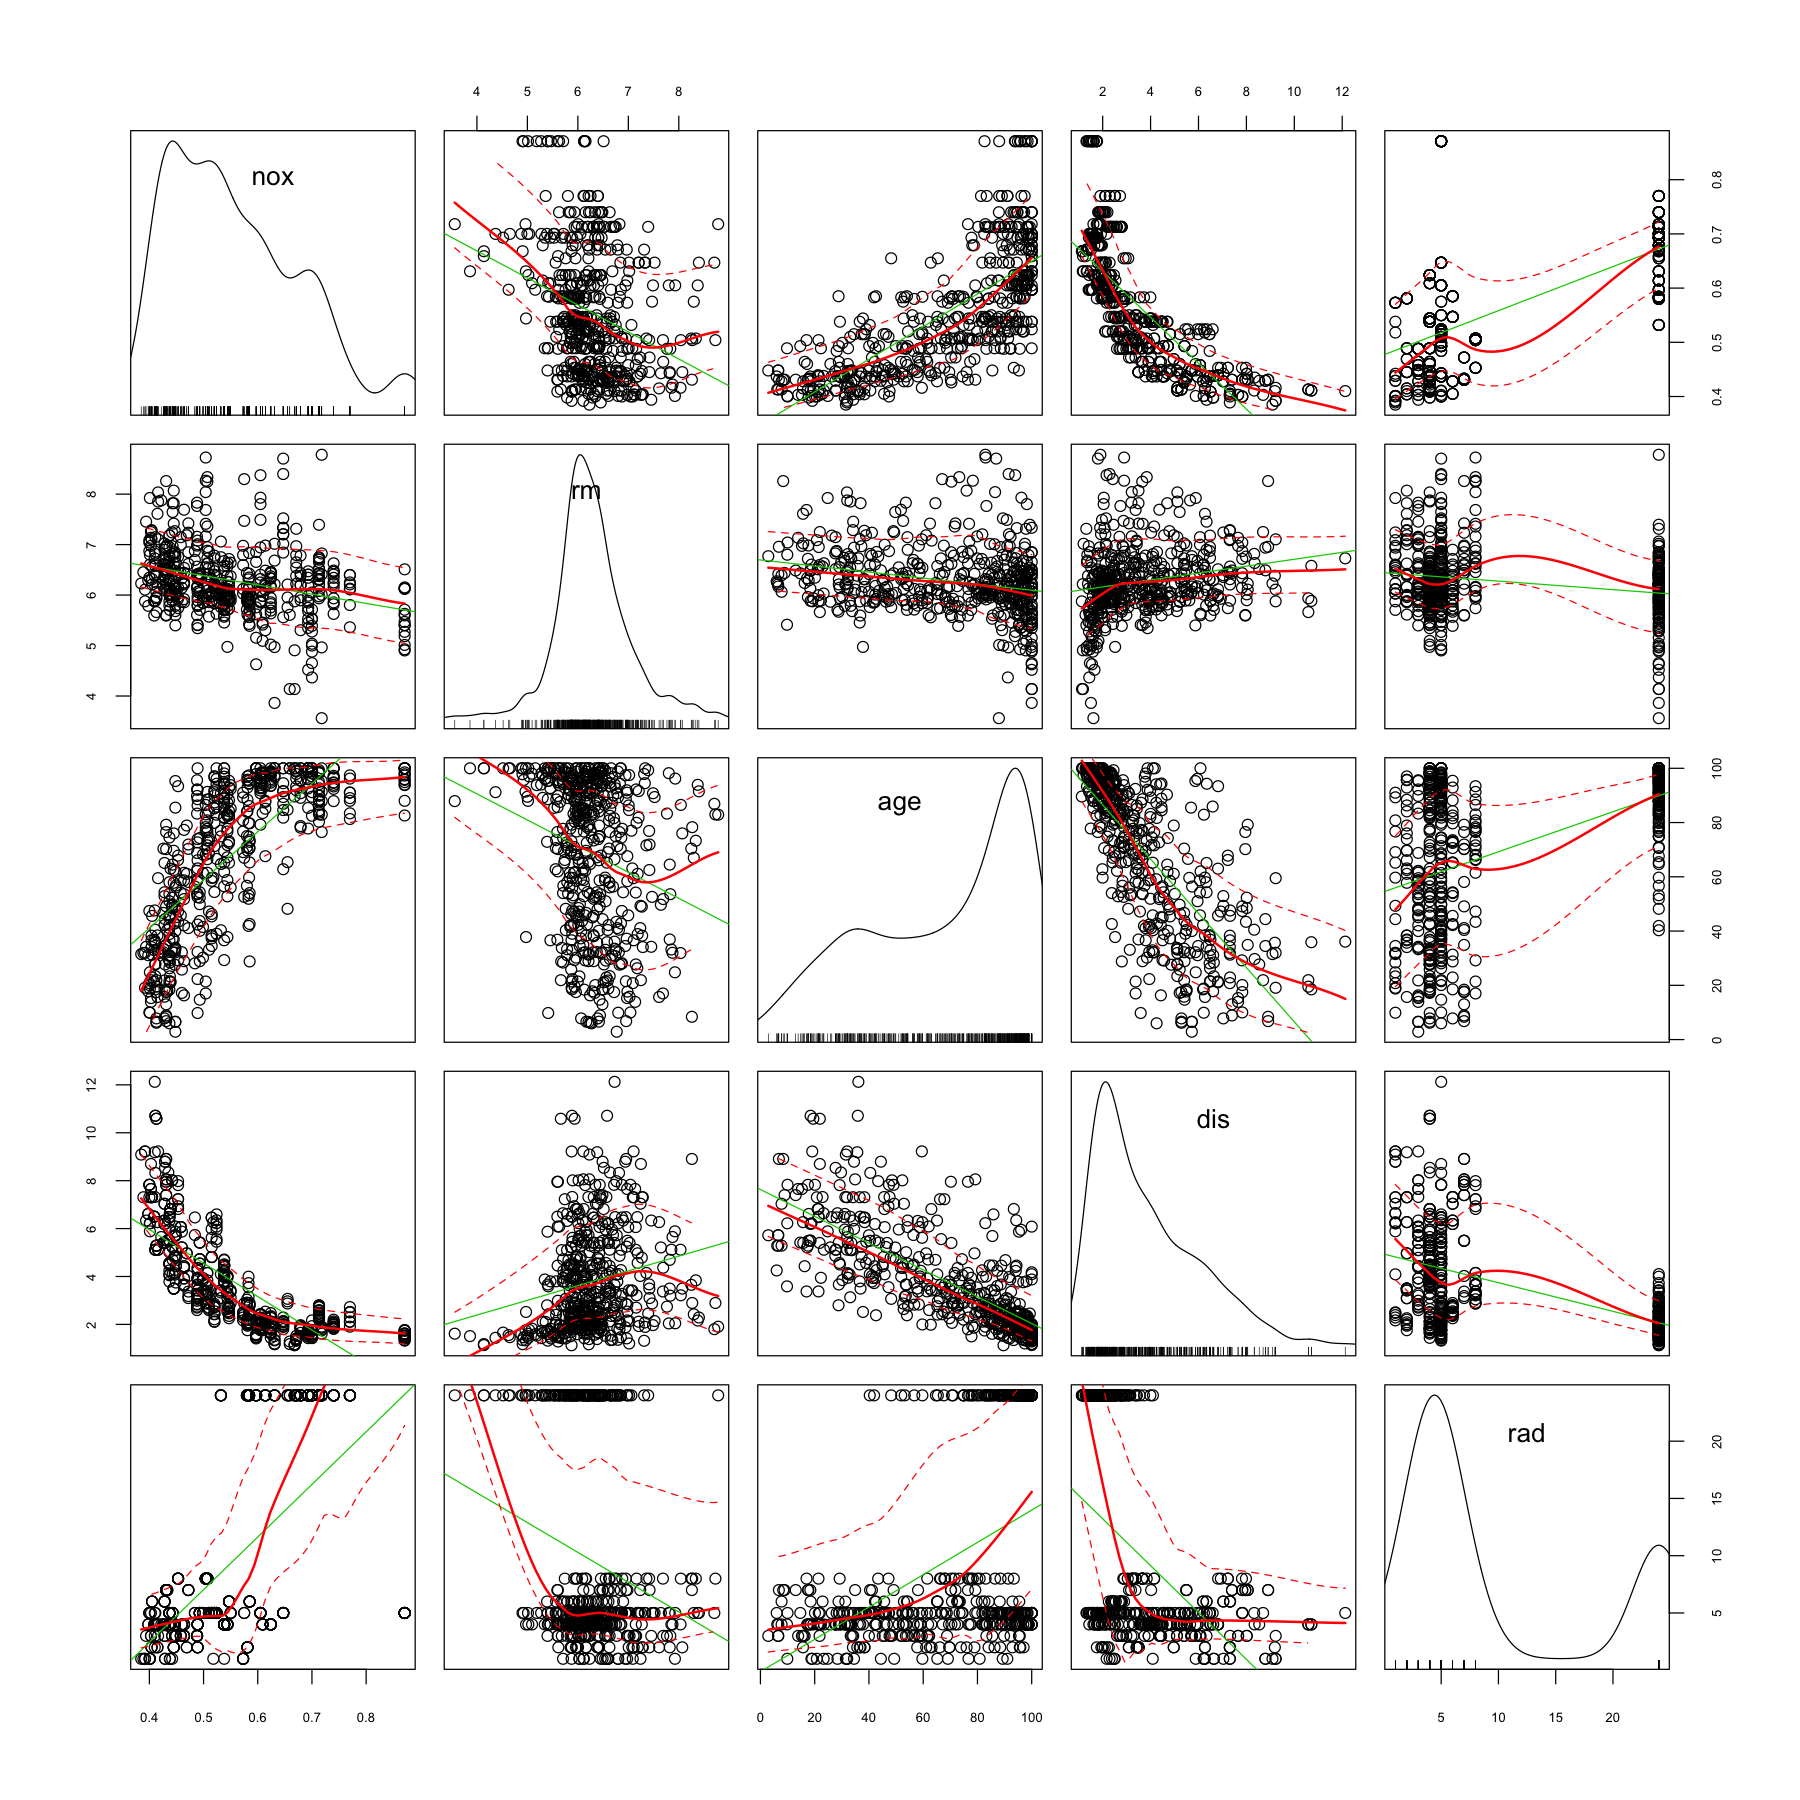

In [81]:
options(repr.plot.height = 15, repr.plot.width = 15, repr.plot.pointsize = 22)
scatterplotMatrix(Boston[,6:10])

> Here you can see blah and blah and blah

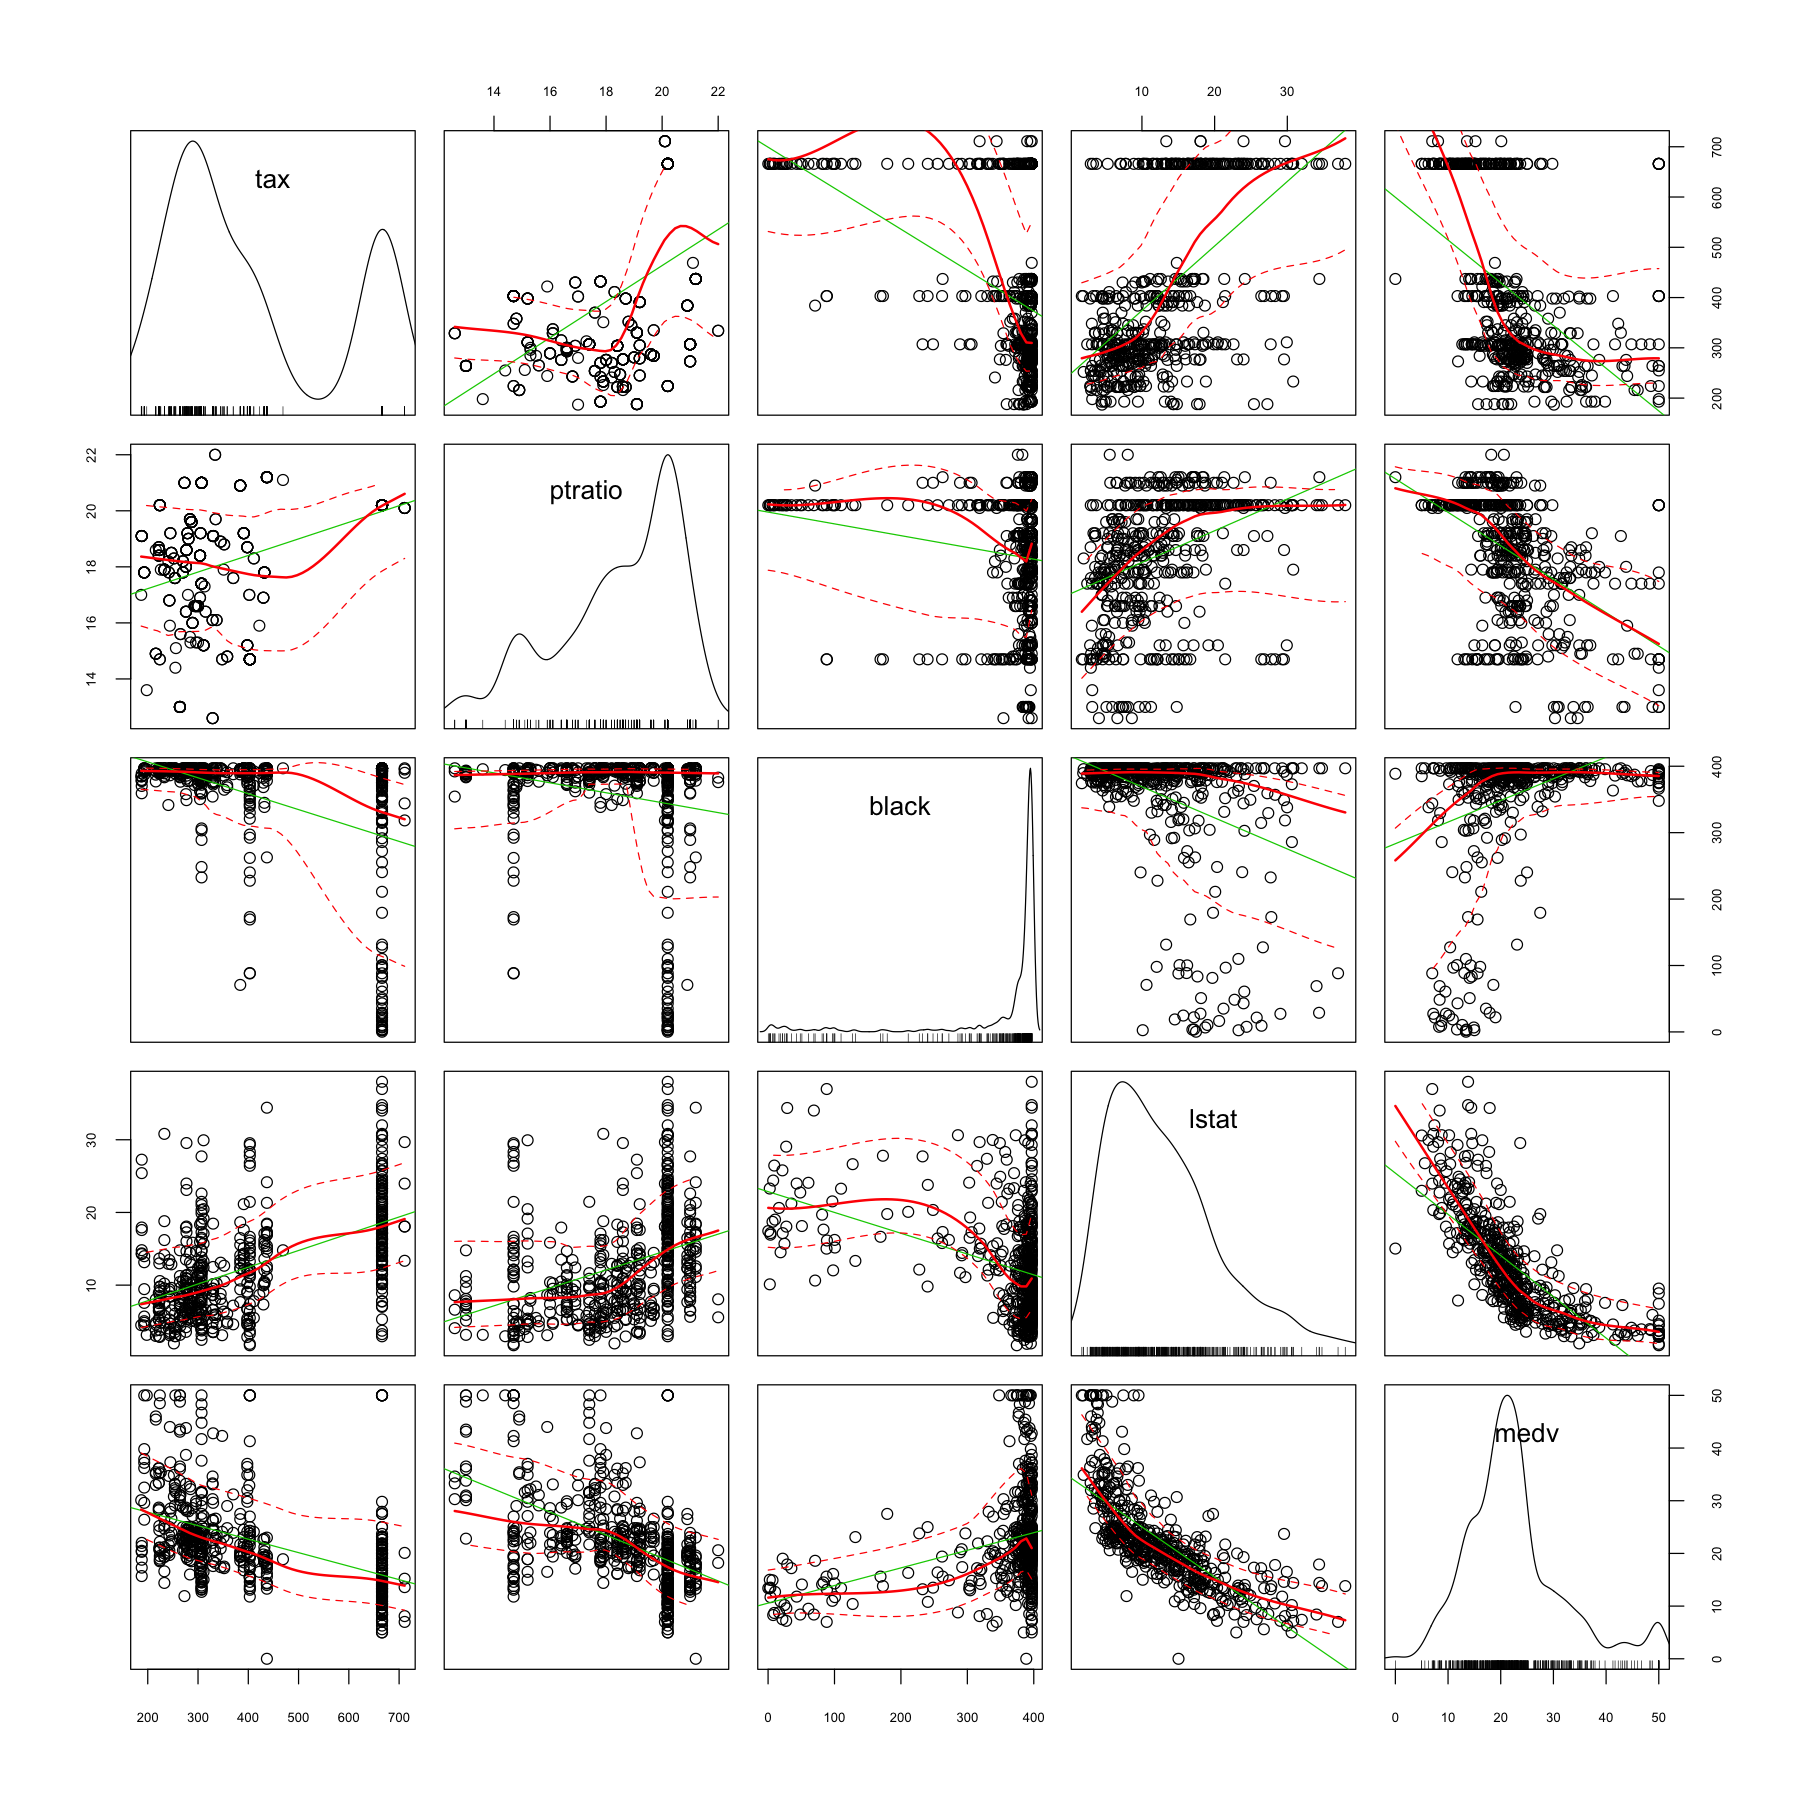

In [82]:
options(repr.plot.height = 15, repr.plot.width = 15, repr.plot.pointsize = 22)
scatterplotMatrix(Boston[,11:15])

> Here you can see blah and blah and blah

** 2.2 ** Examine the main output variable, medv.  Comment on any unusual values you find, and any features that might be important for statistical modeling.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   16.85   21.20   22.50   25.00   50.00 

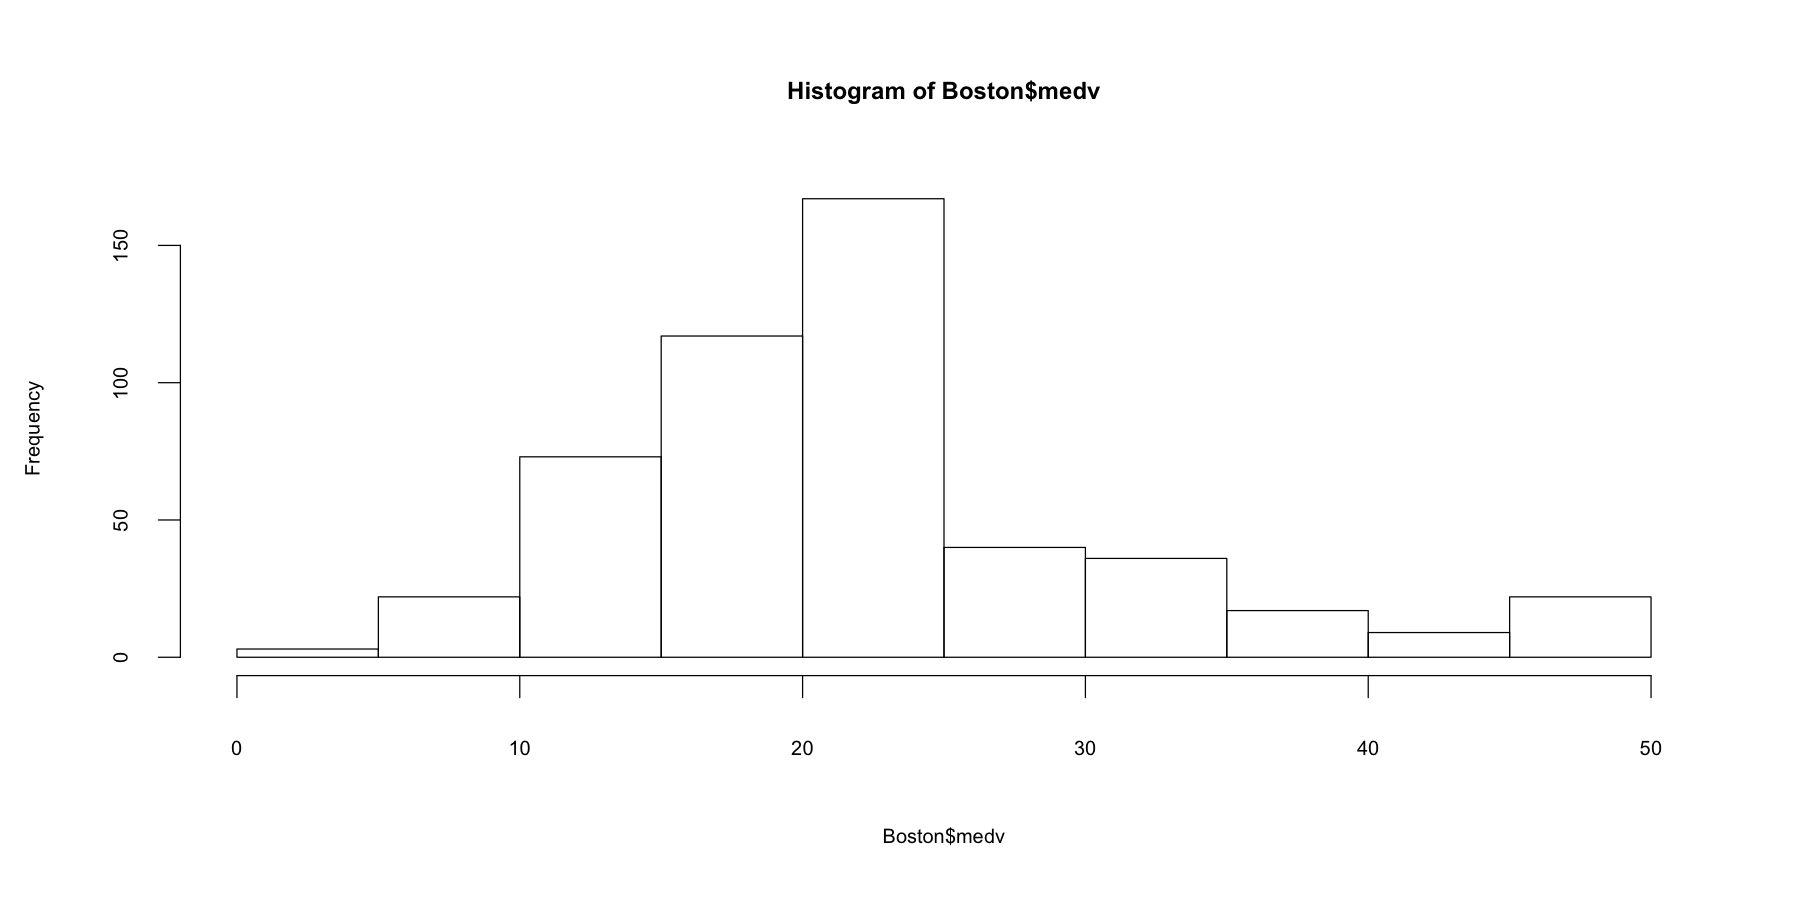

In [3]:
options(repr.plot.height = 7.5, repr.plot.width = 15, repr.plot.pointsize = 22)
hist(Boston$medv)
summary(Boston$medv)

>Having a minimum value median home price of zero is nonsensical, lets take a look at the data points there are with this value 

In [85]:
Boston[Boston$medv == 0,]

,X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
134,134,0.32982,0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,0


> Looks like this is actually a missing value since, if we have a look at the summary of the data set the other variable values are reasonable.

In [4]:
summary(Boston)

       X              crim                zn             indus      
 Min.   :  1.0   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:127.2   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :253.5   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :253.5   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:379.8   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 Max.   :506.0   Max.   :88.97620   Max.   :100.00   Max.   :27.74  
      chas              nox               rm             age        
 Min.   :0.00000   Min.   :0.3850   Min.   :3.561   Min.   :  2.90  
 1st Qu.:0.00000   1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02  
 Median :0.00000   Median :0.5380   Median :6.208   Median : 77.50  
 Mean   :0.06917   Mean   :0.5547   Mean   :6.285   Mean   : 68.57  
 3rd Qu.:0.00000   3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08  
 Max.   :1.00000   Max.   :0.8710   Max.   :8.780   Max.   :100.00  
      dis              rad        

> *As a result we will recode this value as NA*

In [87]:
Boston$medv[Boston$medv==0] = NA
Boston[134,]

,X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
134,134,0.32982,0,21.89,0,0.624,5.822,95.4,2.4699,4,437,21.2,388.69,15.03,NA


> Next, Having a median value of exactly 50 is weird, we may be concerned that this is a top code lets have a look at how many data points have them

In [88]:
Boston[Boston$medv == 50,]

,X,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
162,162,1.46336,0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50
163,163,1.83377,0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50
164,164,1.51902,0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50
167,167,2.01019,0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50
187,187,0.05602,0,2.46,0,0.4880,7.831,53.6,3.1992,3,193,17.8,392.63,4.45,50
196,196,0.01381,80,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50
205,205,0.02009,95,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50
226,226,0.52693,0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50
258,258,0.61154,20,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50


>Looks like the value of 50 is a top code meaning that median home value in these towns is greater than or equal to 50

>There is nothing more to do here other than just keep this fact in mind.

**2.3** Examine the main independent variable of interest, crim.  What transformation could you apply to this variable to aid in visualizing it?  Comment on any unusual features you find.

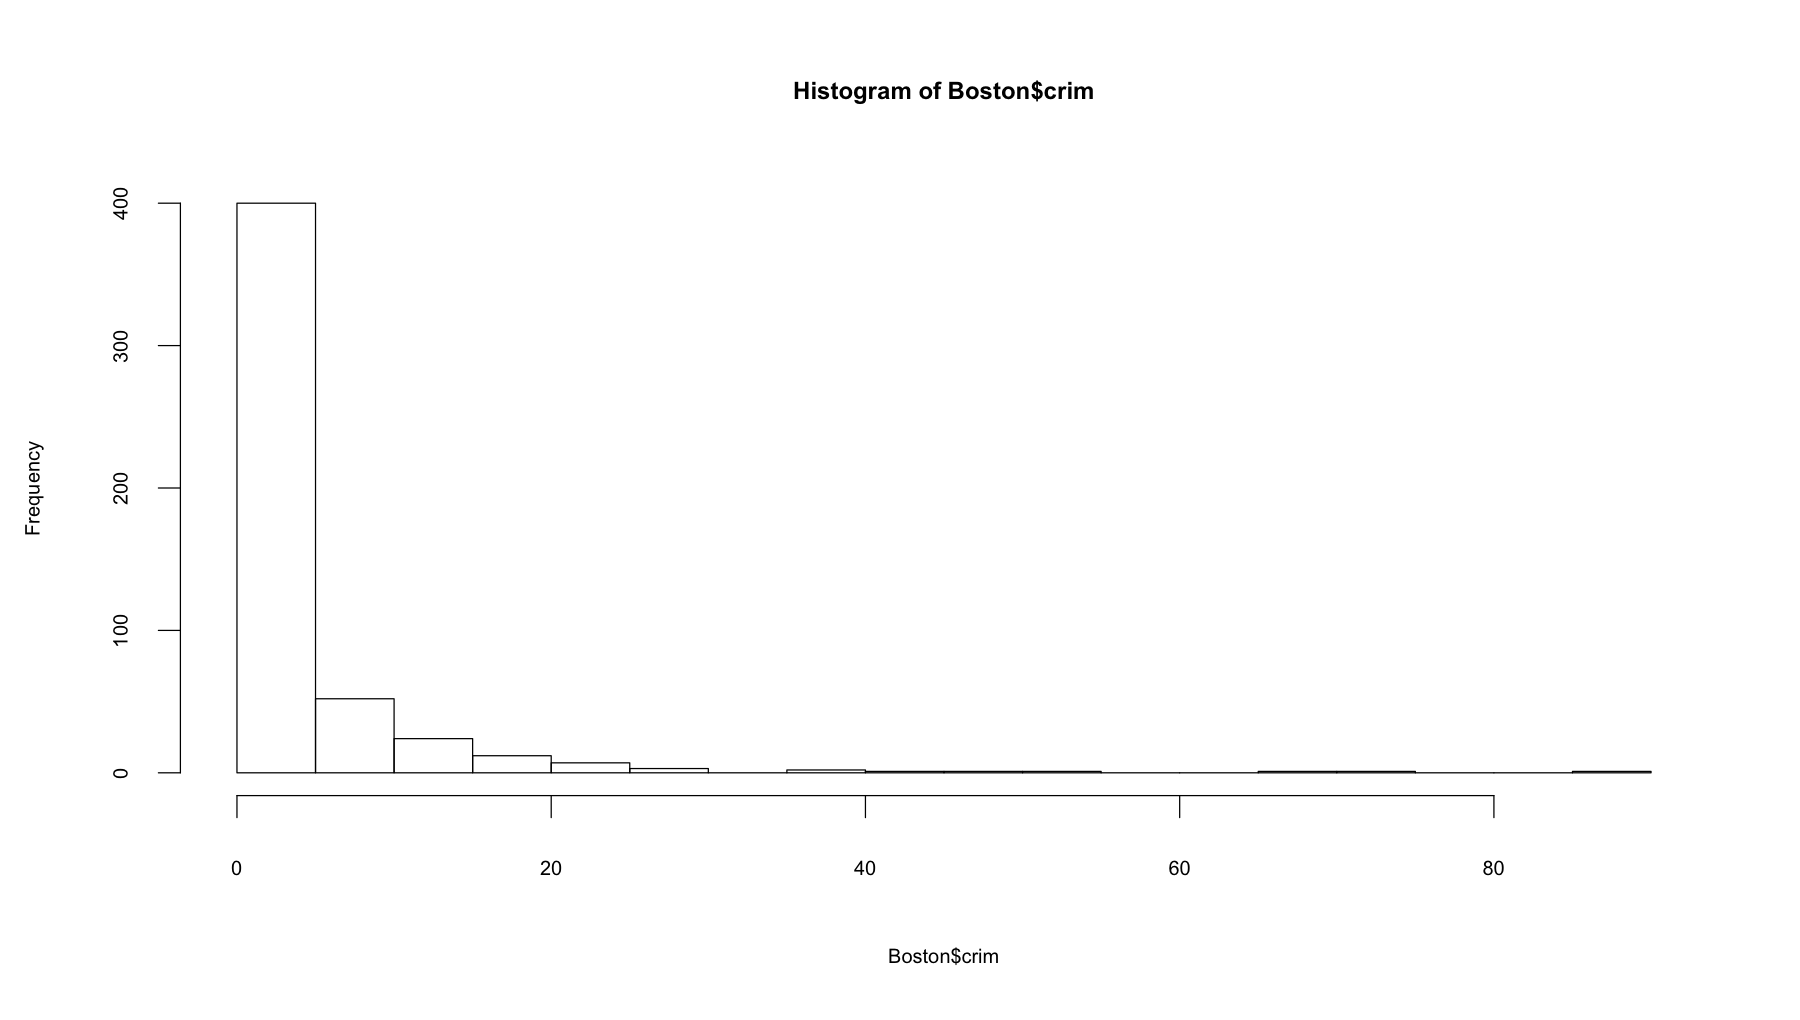

In [7]:
options(repr.plot.height = 8.5, repr.plot.width = 15, repr.plot.pointsize = 22)
hist(Boston$crim,breaks = 20)

In [90]:
summary(Boston$crim)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 0.00632  0.08204  0.25651  3.61352  3.67708 88.97620 

> We can see that the crim variable has is strictly positive with a heavy right skew, these are the kind of variables which are strong candidates for a log transformation

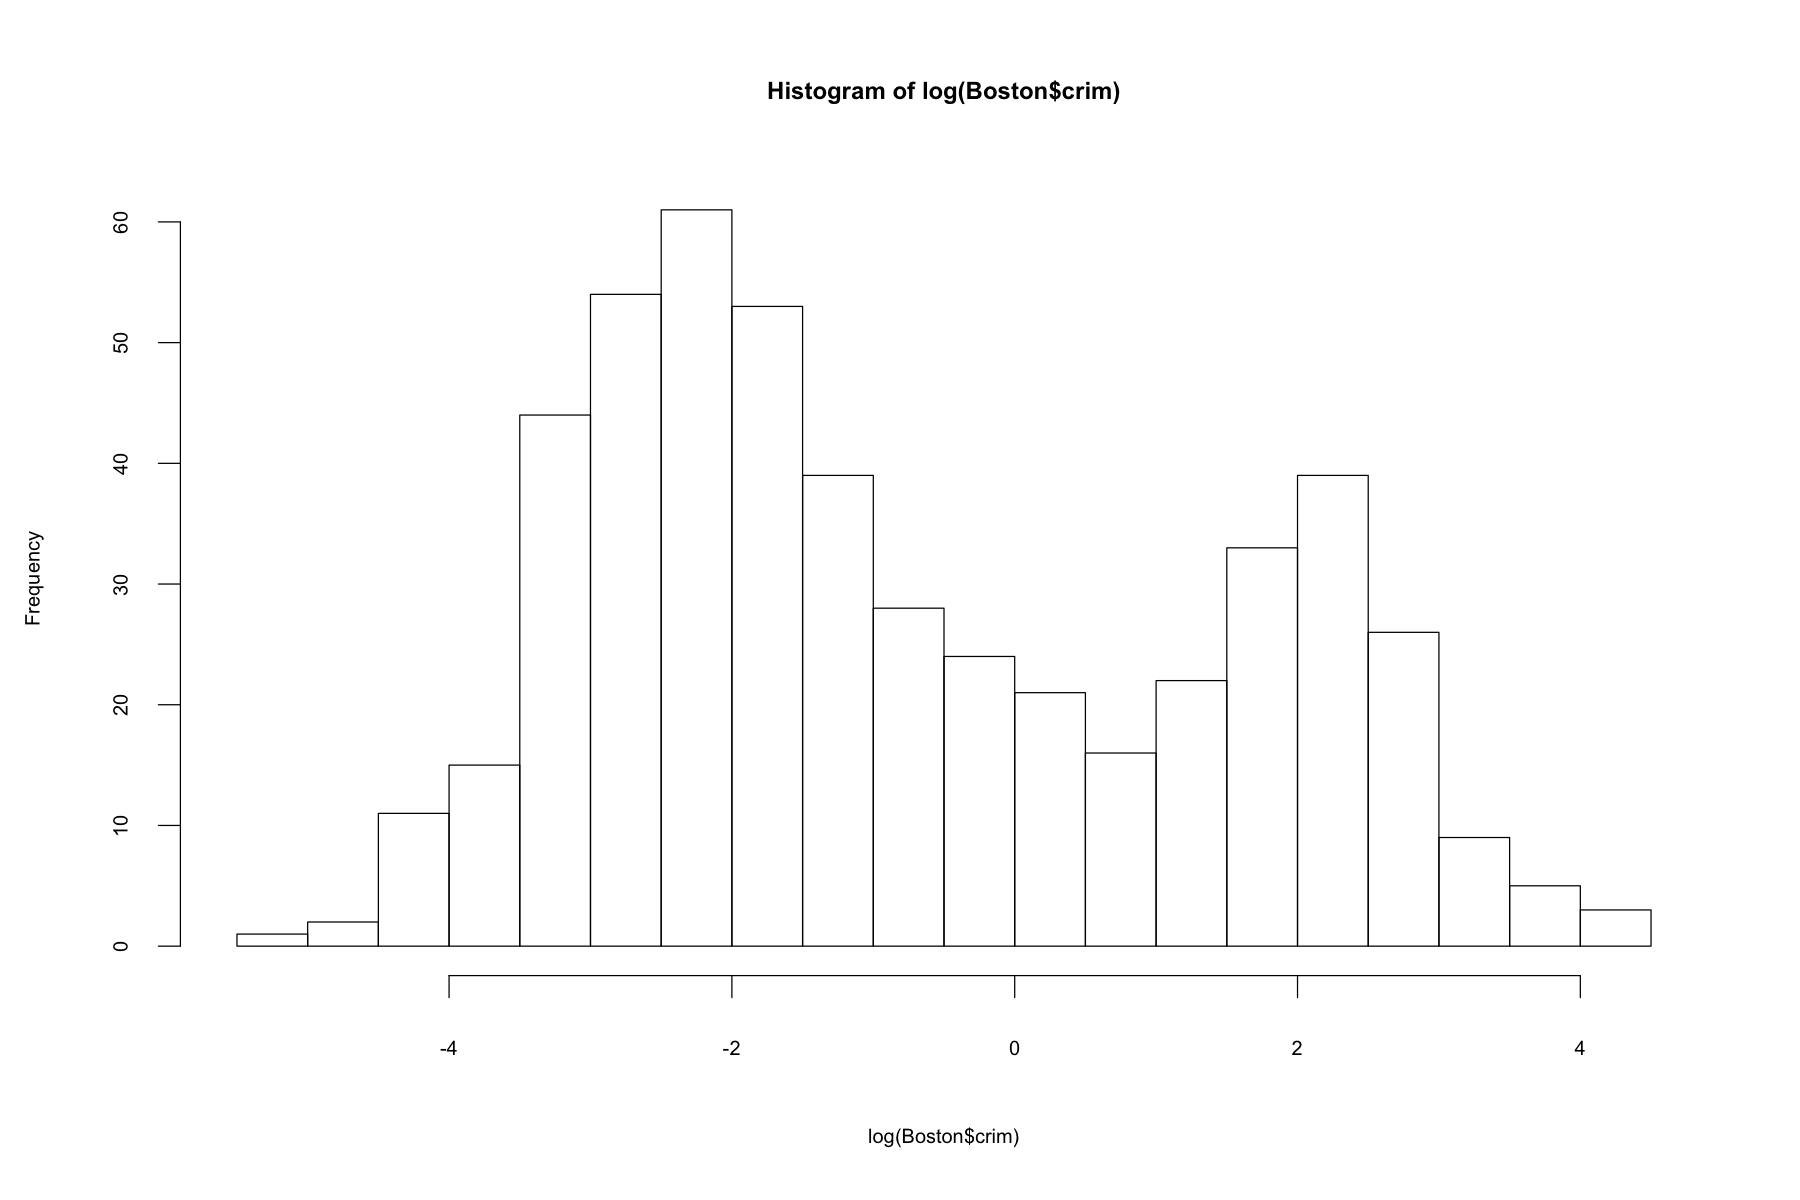

In [91]:
hist(log(Boston$crim), breaks = 15)

> We can see that the log transformation gives us a nice compact bi-modal distribution which as we will see much later in the class will help up identify linear relationships between variables.

** 2.4 ** Examine the bivariate relationship between medv and crime.  What type of relationship do these variables have?


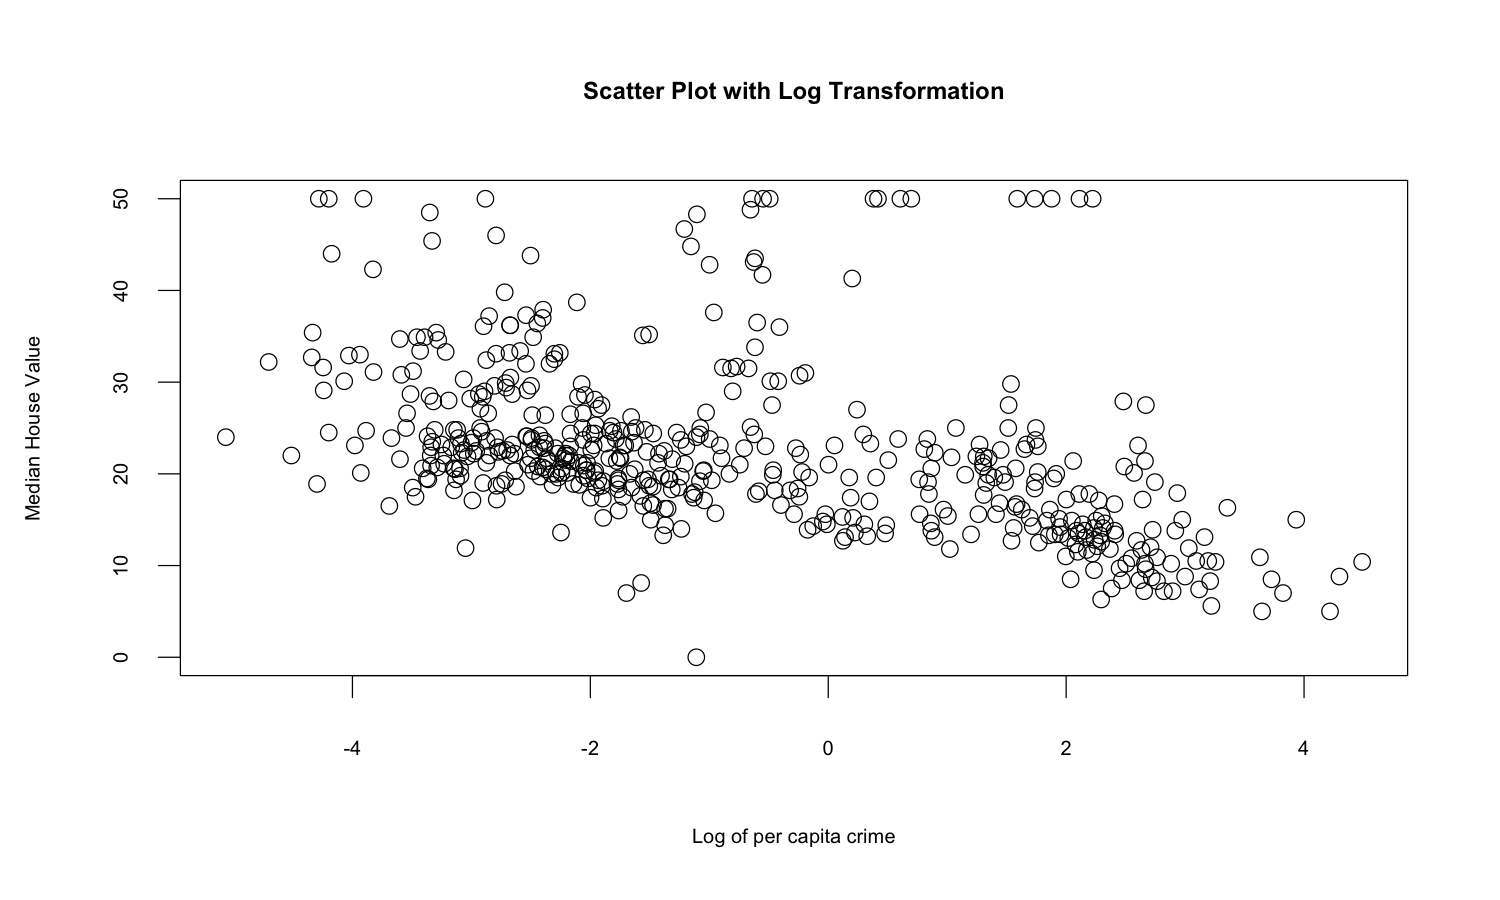

In [21]:
options(repr.plot.height = 7.5, repr.plot.width = 12.5, repr.plot.pointsize = 22)
plot(log(Boston$crim),Boston$medv, main = "Scatter Plot with Log Transformation",
     col = 'black', xlab = 'Log of per capita crime', ylab = 'Median House Value')

> We can see that there is a generally negative relationship between crime and median home value

> We might be a little critical of this because of a couple values with medv = 50 and crim value of between -1 and 3 which would throw of any linear fit we might want to do.

> But we have to remember that these are top codes which might lead us to exclude them from a linear fitting procedure.

**2.5** (As time permits) Continue your exploratory data analysis.  Be prepared to share interesting findings with the class.

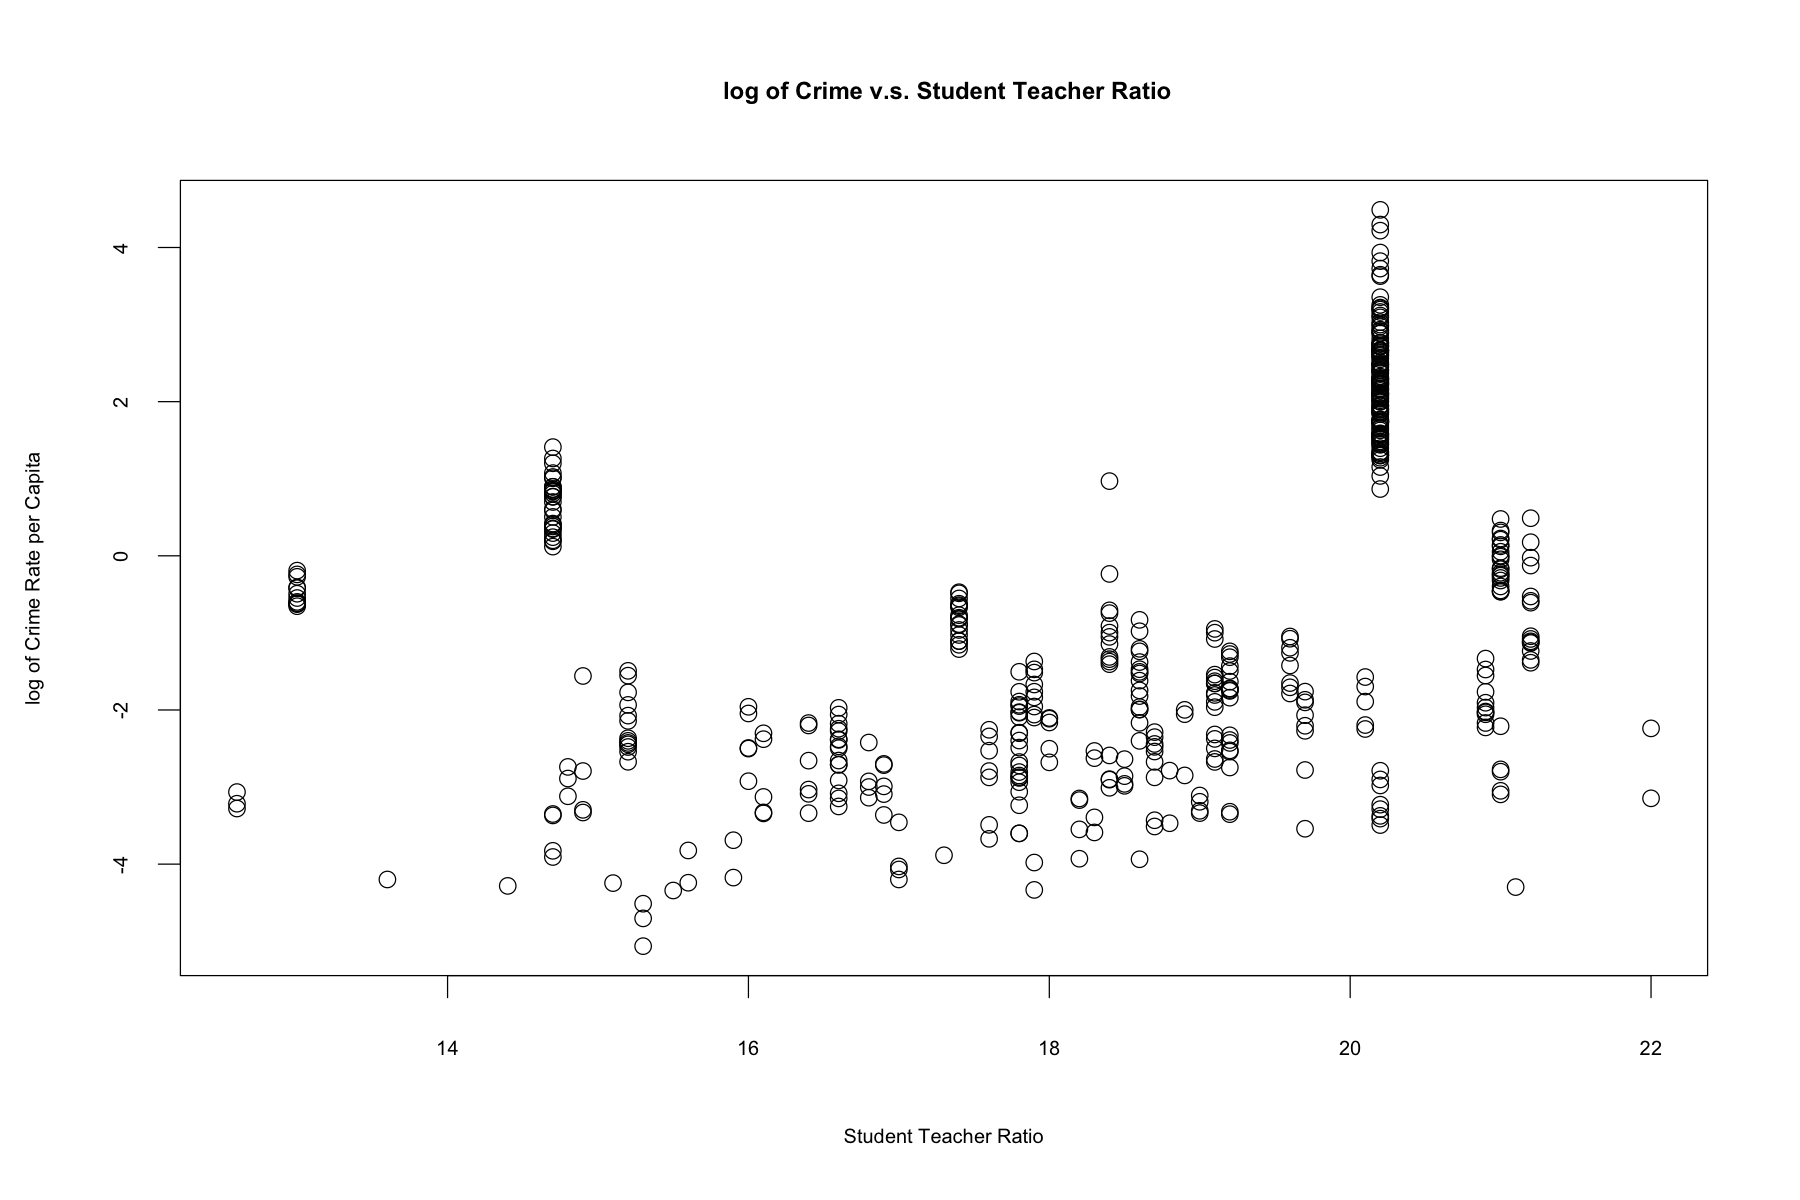

In [93]:
options(repr.plot.height = 10, repr.plot.width = 15, repr.plot.pointsize = 22)
plot(Boston$ptratio,log(Boston$crim), 
     main = ' log of Crime v.s. Student Teacher Ratio',
     xlab ='Student Teacher Ratio', 
     ylab = 'log of Crime Rate per Capita' )

> The above scatter plot makes us wonder why almost all the towns which have a log crim rate above 1 have a student teacher ratio of either 14.7 or  20.2

In [94]:
summary(Boston[log(Boston$crim) > 1,]$ptratio)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  14.70   20.20   20.20   19.96   20.20   20.20 

> We know that crime and income are negatively correllated meaning that crime rates in lower income areas tend to be higher for various reasons

> We also know that many places implement caps on student teacher ratios and areas which are low income are more likely to run up against these caps due to tight fiscal situations, thus this might be the story which explains this feature of the data

> This particular story may not be true but it is important that when you find strange features in your data set to try to use out of sample (domain) information to understand/explain it.

> You must be a story teller in data science.